# IMPORTING LIBRARIES

In [1]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# LOADING DATASET

In [2]:
# Making data frame from csv
Data = pd.read_csv('../input/water-quality/water_potability.csv')
df= pd.DataFrame(Data)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


> <font color='black'> **Dataset features:** <font>
  *   ph: PH is the indicator of acidic or alkaline condition of water status. WHO has recommended a maximum permissible limit of pH from 6.5 to 8.5. 
    
  *   Hardness: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.
    
  *   Solids:  Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced an unwanted taste and diluted color in the appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. The Desired limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which is prescribed for drinking purposes.
    
  *   Chloramines: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.
    
  *    Sulfate: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations. 
    
  *   Conductivity: Pure water is not a good conductor of electric current rather it's a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceed 400 μS/cm.
    
  *   Organic_carbon: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to the US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is used for treatment.
     
  * Trihalomethanes: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.
    
  * Turbidity: The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.
    
  * Potability (Target): Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable. (0) Water is not safe to drink and (1) Water is safe to drink.

# <font color = 'black'>EDA <font>  <font color = 'black'> <font color = 'red'>AND<font color = 'black'> PREPROCESSING <font>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

 # Multivariate Analysis: Using Pairplots

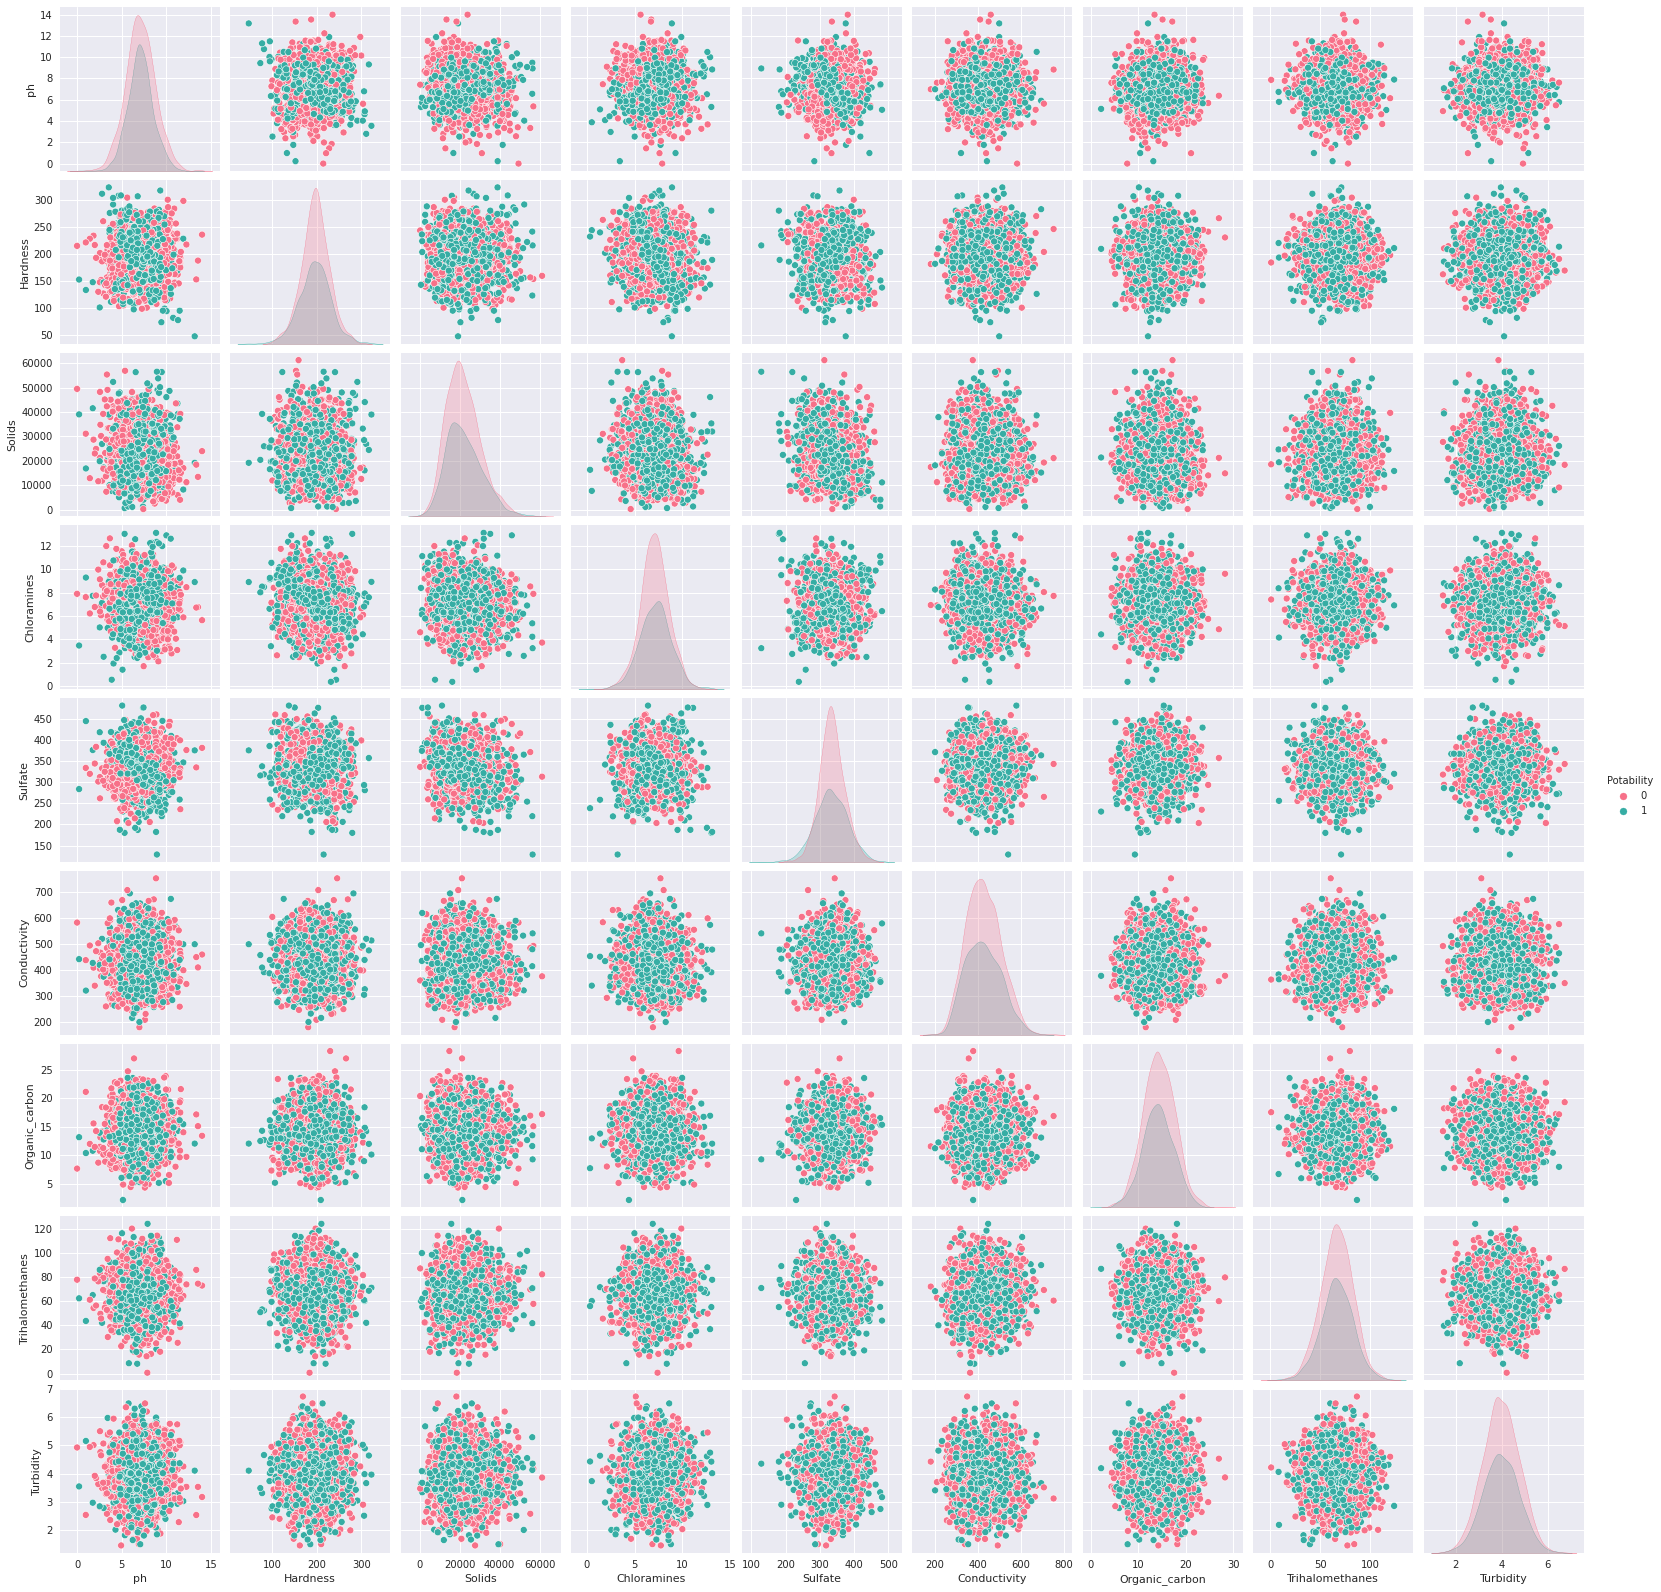

In [7]:
sns.pairplot(df, hue="Potability", palette="husl",diag_kind="kde")
plt.show()

In [8]:
df.shape

(3276, 10)

In [9]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Correlation

Text(0.5, 1.0, 'Features Correlating with Potability')

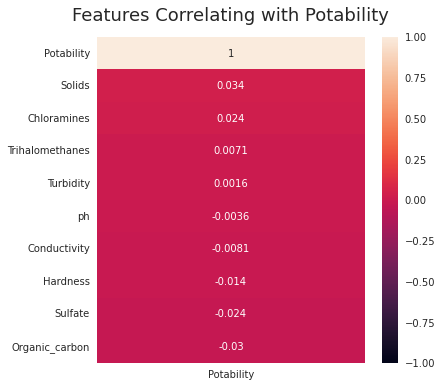

In [10]:
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(df.corr()[['Potability']].sort_values(by='Potability', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Potability', fontdict={'fontsize':18}, pad=16)

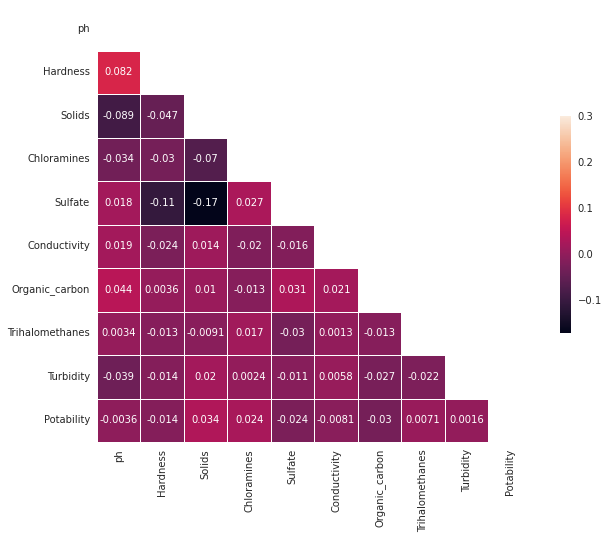

In [11]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

with sns.axes_style("white"):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

### We handle the missing values, we fill the missing values in our feachers using a mean value of each feature.

In [12]:
df.fillna(df.mean(), inplace = True)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [13]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Data visualization

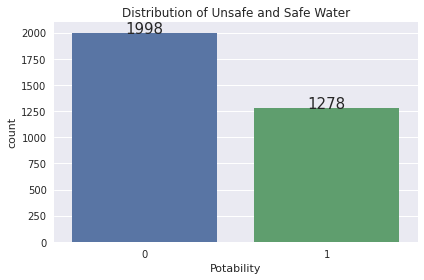

In [14]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x = df['Potability'], data = df)
plt.title("Distribution of Unsafe and Safe Water")
# show count (+ annotate)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.7,rect.get_height(),horizontalalignment='center', fontsize = 15)       
        
plt.tight_layout()
plt.show()

In [15]:
df["Potability"].value_counts(normalize=True)*100

0    60.989011
1    39.010989
Name: Potability, dtype: float64

In [16]:
plt.figure(figsize=(6, 4))
fig = px.pie(df, names="Potability")
fig.show()

<Figure size 432x288 with 0 Axes>

### The ph value of the water is an important factor in evaluating the acid-base balance of the water. The pH value of drinking water should be between 6.5 and 8.5.

In [17]:
figure = px.histogram(df, x = "ph", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: PH")
figure.show()

### The hardness of water usually depends on its source, but water with a hardness of 120-200 milligrams is drinkable.

In [18]:
figure = px.histogram(df, x = "Hardness", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Hardness")
figure.show()

###  All organic and inorganic minerals present in water are called dissolved solids. Water with a very high number of dissolved solids is highly mineralized.

In [19]:
figure = px.histogram(df, x = "Solids", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Solids")
figure.show()

### Chloramine and chlorine are disinfectants used in public water systems.

In [20]:
figure = px.histogram(df, x = "Chloramines", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Chloramines")
figure.show()

### Sulfate is a substance naturally present in minerals, soil, and rocks. Water containing less than 500 milligrams of sulfate is safe to drink.

In [21]:
figure = px.histogram(df, x = "Sulfate", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Sulfate")
figure.show()

### Water is a good conductor of electricity, but the purest form of water is not a good conductor of electricity. Water with an electrical conductivity of less than 500 is drinkable.

In [22]:
figure = px.histogram(df, x = "Conductivity", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Conductivity")
figure.show()

### Organic carbon comes from the breakdown of natural organic materials and synthetic sources. Water containing less than 25 milligrams of organic carbon is considered safe to drink.

In [23]:
figure = px.histogram(df, x = "Organic_carbon", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Organic Carbon")
figure.show()

### Trihalomethanes or THMs are chemicals found in chlorine-treated water. Water containing less than 80 milligrams of THMs is considered safe to drink.

In [24]:
figure = px.histogram(df, x = "Trihalomethanes", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Trihalomethanes")
figure.show()

### The turbidity of water depends on the number of solids present in suspension. Water with a turbidity of fewer than 5 milligrams is considered drinkable.

In [25]:
figure = px.histogram(df, x = "Turbidity", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Turbidity")
figure.show()

# <font color = 'redd'>Water Quality Prediction:<font color = 'black'>

# 1. KNN Algorithm

In [26]:
#df cols
x = pd.DataFrame(df, columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                                'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']).values
y = df['Potability'].values.reshape(-1, 1) #Target variable
x

array([[7.08079450e+00, 2.04890455e+02, 2.07913190e+04, ...,
        8.69909705e+01, 2.96313538e+00, 0.00000000e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        5.63290763e+01, 4.50065627e+00, 0.00000000e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        6.64200925e+01, 3.05593375e+00, 0.00000000e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        6.98454003e+01, 3.29887550e+00, 1.00000000e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        7.74882131e+01, 4.70865847e+00, 1.00000000e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        7.86984463e+01, 2.30914906e+00, 1.00000000e+00]])

In [27]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 0)

In [28]:
K = 5
clf = KNeighborsClassifier(K)
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)

In [29]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.5405405405405406


## Creat a For loop to find optimal K

In [30]:
K = 20
Acc = np.zeros((K))
for i in range(1, K+1):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train, y_train.ravel())
    y_pred = clf.predict(x_test)
    Acc[i-1] = metrics.accuracy_score(y_test, y_pred)
Acc

array([0.5440279 , 0.59808195, 0.55013078, 0.57279861, 0.54054054,
       0.5902354 , 0.57018309, 0.59982563, 0.59546643, 0.59459459,
       0.60331299, 0.60767219, 0.59808195, 0.61726242, 0.60767219,
       0.60854403, 0.60505667, 0.62074978, 0.60767219, 0.6146469 ])

In [31]:
print(np.max(Acc))
print(np.min(Acc))

0.6207497820401047
0.5405405405405406


### try KNN for different k nearest neighbor from 1 to 30 through plotting

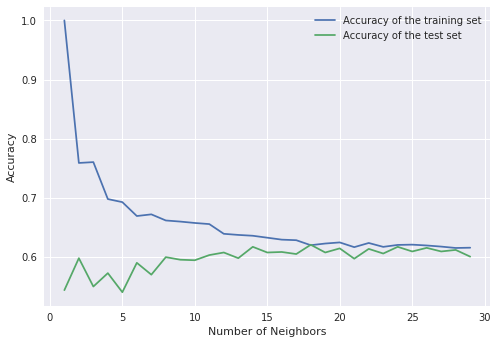

In [32]:
training_acc = []
test_acc = []

# try KNN for different k nearest neighbor from 1 to 30
neighbors_setting = range(1, 30)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train, y_train.ravel())
    training_acc.append(knn.score(x_train, y_train))
    test_acc.append(knn.score(x_test, y_test))
plt.plot(neighbors_setting, training_acc, label = 'Accuracy of the training set')
plt.plot(neighbors_setting, test_acc, label = 'Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid(True)
plt.legend()
plt.show()  

## <font color = 'redd'>According above codes and plot the optimal K is <font color = 'red'>18<font><font color = 'black'>

# Improve Model

#### Apply GridSearchCV to optomize parameters

In [33]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1, 31)}
  
# defining parameter range
grid_kn = GridSearchCV(estimator = knn, # Model
                       param_grid = parameters, # Range of K
                       scoring='accuracy',  # Evaluation on test set
                       cv=5, # Cross Validation
                       verbose = 1, # Time to calculate
                       n_jobs = -1) # Help to CPU  ====> For big dataset
  
# fitting the model for grid search
grid_kn.fit(x_train, y_train.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=29), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy',
             verbose=1)

In [34]:
grid_kn.best_params_

{'n_neighbors': 24}

In [35]:
grid_kn.best_score_

0.5922938414802541

#### Using GridSearchCV is not a good help here!!!

 > <font color='red'> **Then we can say that the best value k is 18.** <font>
  *   Accuracy of model at K=18 is  0.62 